# 3. 토픽 모델링

## 3.1. LDA(Latent Dirichlet Allocation)

In [7]:
!pip install gensim   # LDA 제공

Invalid requirement: '#'



In [8]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer  # 어간 추출
from gensim import corpora, models
import gensim
from nltk.tokenize import RegexpTokenizer  # 정규표현식을 사용해서 단어 토큰화 수행

In [9]:
tokenizer = RegexpTokenizer('[\w]+')  # \w : 단어 영문자+숫자+_(밑줄) [0-9a-zA-Z_]

In [10]:
stop_words = stopwords.words('english')

In [11]:
p_stemmer = PorterStemmer()  # 어간 추출

In [12]:
doc_a = "Brocolli is good to eat. My brother likes to eat good brocolli, but not my mother."
doc_b = "My mother spends a lot of time driving my brother around to baseball practice."
doc_c = "Some health experts suggest that driving may cause increased tension and blood pressure."
doc_d = "I often feel pressure to perform well at school, but my mother never seems to drive my brother to do better."
doc_e = "Health professionals say that brocolli is good for your heath."
doc_f = "Big data is a term used to refer to data sets that are too large or complex for traditional data-processing application software to adequately deal with."
doc_g = "Data with many cases offer greater statistical power, while data with higher complexity may lead to a higher false discovery rate."
doc_h = "Big data was originally associated with three key concepts: volume, variety, and velocity."
doc_i = "A 2016 definition states that 'Big data represents the information assets characterized by such a high volume, velocity, and variety to require specific technology and analytical methods for its transformation into value'."
doc_j = "Data must be processed with advanced tools to reveal meaningful information."

In [13]:
doc_set = [doc_a, doc_b, doc_c, doc_d, doc_e, doc_f, doc_g, doc_h, doc_i, doc_j]

In [14]:
texts = []  # 텍스트 전처리

In [15]:
for w in doc_set:
    raw = w.lower()  # 모든 문자 소문자로 변환
    tokens = tokenizer.tokenize(raw)  # 단어 토큰화
    stopped_tokens = [i for i in tokens if not i in stop_words]  # 불용어 제거
    stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]  # 어간 추출
    texts.append(stemmed_tokens)

In [16]:
dictionary = corpora.Dictionary(texts)  # 단어 Dictionary 변환
dict(dictionary)

{0: 'brocolli',
 1: 'brother',
 2: 'eat',
 3: 'good',
 4: 'like',
 5: 'mother',
 6: 'around',
 7: 'basebal',
 8: 'drive',
 9: 'lot',
 10: 'practic',
 11: 'spend',
 12: 'time',
 13: 'blood',
 14: 'caus',
 15: 'expert',
 16: 'health',
 17: 'increas',
 18: 'may',
 19: 'pressur',
 20: 'suggest',
 21: 'tension',
 22: 'better',
 23: 'feel',
 24: 'never',
 25: 'often',
 26: 'perform',
 27: 'school',
 28: 'seem',
 29: 'well',
 30: 'heath',
 31: 'profession',
 32: 'say',
 33: 'adequ',
 34: 'applic',
 35: 'big',
 36: 'complex',
 37: 'data',
 38: 'deal',
 39: 'larg',
 40: 'process',
 41: 'refer',
 42: 'set',
 43: 'softwar',
 44: 'term',
 45: 'tradit',
 46: 'use',
 47: 'case',
 48: 'discoveri',
 49: 'fals',
 50: 'greater',
 51: 'higher',
 52: 'lead',
 53: 'mani',
 54: 'offer',
 55: 'power',
 56: 'rate',
 57: 'statist',
 58: 'associ',
 59: 'concept',
 60: 'key',
 61: 'origin',
 62: 'three',
 63: 'varieti',
 64: 'veloc',
 65: 'volum',
 66: '2016',
 67: 'analyt',
 68: 'asset',
 69: 'character',
 70: 

In [17]:
corpus = [dictionary.doc2bow(text) for text in texts]  # 말뭉치 변환
corpus

[[(0, 2), (1, 1), (2, 2), (3, 2), (4, 1), (5, 1)],
 [(1, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1)],
 [(8, 1),
  (13, 1),
  (14, 1),
  (15, 1),
  (16, 1),
  (17, 1),
  (18, 1),
  (19, 1),
  (20, 1),
  (21, 1)],
 [(1, 1),
  (5, 1),
  (8, 1),
  (19, 1),
  (22, 1),
  (23, 1),
  (24, 1),
  (25, 1),
  (26, 1),
  (27, 1),
  (28, 1),
  (29, 1)],
 [(0, 1), (3, 1), (16, 1), (30, 1), (31, 1), (32, 1)],
 [(33, 1),
  (34, 1),
  (35, 1),
  (36, 1),
  (37, 3),
  (38, 1),
  (39, 1),
  (40, 1),
  (41, 1),
  (42, 1),
  (43, 1),
  (44, 1),
  (45, 1),
  (46, 1)],
 [(18, 1),
  (36, 1),
  (37, 2),
  (47, 1),
  (48, 1),
  (49, 1),
  (50, 1),
  (51, 2),
  (52, 1),
  (53, 1),
  (54, 1),
  (55, 1),
  (56, 1),
  (57, 1)],
 [(35, 1),
  (37, 1),
  (58, 1),
  (59, 1),
  (60, 1),
  (61, 1),
  (62, 1),
  (63, 1),
  (64, 1),
  (65, 1)],
 [(35, 1),
  (37, 1),
  (63, 1),
  (64, 1),
  (65, 1),
  (66, 1),
  (67, 1),
  (68, 1),
  (69, 1),
  (70, 1),
  (71, 1),
  (72, 1),
  (73, 1),
  (74, 1),
 

In [49]:
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = 3, id2word = dictionary)  # Topic 개수 = 3

In [50]:
ldamodel.print_topics(num_words = 5)  # 상위 5개 단어, 토픽에 대한 해당 단어의 비중

[(0,
  '0.043*"data" + 0.032*"big" + 0.032*"veloc" + 0.031*"volum" + 0.031*"varieti"'),
 (1,
  '0.033*"brocolli" + 0.033*"mother" + 0.033*"good" + 0.033*"brother" + 0.033*"eat"'),
 (2,
  '0.063*"data" + 0.030*"process" + 0.025*"complex" + 0.023*"brother" + 0.022*"drive"')]

In [51]:
ldamodel.get_document_topics(corpus)[0]  # 0번째 문서에 토픽 1~3의 분포

[(0, 0.03442131), (1, 0.9314954), (2, 0.034083232)]

## 3.2. LDA 토픽 개수 지정

In [21]:
from gensim.models import CoherenceModel  # Topic Coherence 연산 제공

In [52]:
# Perplexity
print('\nPerplexity: ', ldamodel.log_perplexity(corpus))

# Topic Coherence
coherence_model_lda = CoherenceModel(model = ldamodel, texts = texts, dictionary = dictionary, topn = 10)  # 상위 10개 단어로 연산
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -4.992406738729312

Coherence Score:  0.4349396849471841


In [23]:
import matplotlib.pyplot as plt

#### Perplexity

In [32]:
perplexity_values = []

for i in range(2, 10):
    ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = i, id2word = dictionary)
    perplexity_values.append(ldamodel.log_perplexity(corpus))

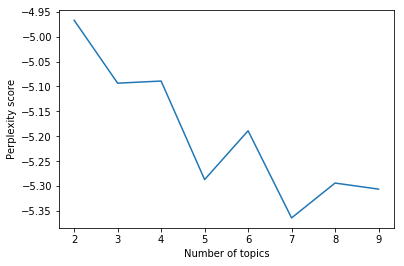

In [33]:
x = range(2, 10)
plt.plot(x, perplexity_values)
plt.xlabel("Number of topics")
plt.ylabel("Perplexity score")
plt.show()

#### Topic Coherence

In [36]:
coherence_values = []

for i in range(2, 10):
    ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = i, id2word = dictionary)
    coherence_model_lda = CoherenceModel(model = ldamodel, texts = texts, dictionary = dictionary, topn = 10)
    coherence_lda = coherence_model_lda.get_coherence()
    coherence_values.append(coherence_lda)

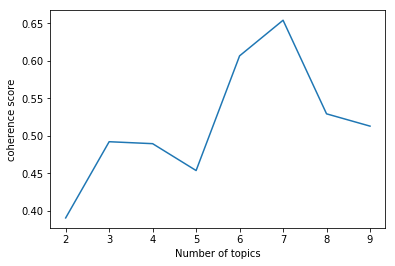

In [37]:
x = range(2, 10)
plt.plot(x, coherence_values)
plt.xlabel("Number of topics")
plt.ylabel("coherence score")
plt.show()

## 추가 : LDA 시각화

In [41]:
!pip install pyLDAvis

In [42]:
import pyLDAvis.gensim  # LDA 시각화
from gensim import corpora, models
import gensim

In [45]:
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = 3, id2word = dictionary)  # Topic 개수 = 3

In [53]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary)
pyLDAvis.display(vis)

C:\Users\SOJINSOO\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


## 추가 : Scikit-learn을 사용한 LDA 분석

In [54]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [55]:
def flatten(l):
    flatList = []
    
    for elem in l:
        if type(elem) == list:
            for e in elem:
                flatList.append(e)
        else:
            flatList.append(elem)

    return flatList

word_list = flatten(texts)

In [56]:
vectorizer = TfidfVectorizer(lowercase=False)
term_counts = vectorizer.fit_transform(word_list)

vocabulary = vectorizer.get_feature_names()
vocabulary

topic_model = LatentDirichletAllocation(n_topics = 5)
topic_model.fit(term_counts)

topics = topic_model.components_

for topic_id, weights in enumerate(topics):
    print('topic %d' % topic_id, end = ": ")
    pairs = []
    for term_id, value in enumerate(weights):
         pairs.append((abs(value), vocabulary[term_id]))
    pairs.sort(key = lambda x: x[0], reverse = True)
    for pair in pairs[:10]:
        print(pair[1], end = ",")
    print()

topic 0: data,higher,eat,expert,use,origin,never,greater,statist,tension,
topic 1: brocolli,veloc,process,softwar,analyt,requir,around,fals,spend,say,
topic 2: brother,big,inform,pressur,complex,health,valu,specif,advanc,state,
topic 3: mother,varieti,volum,may,case,lot,deal,suggest,lead,definit,
topic 4: drive,good,transform,tool,blood,seem,must,high,often,character,


C:\Users\SOJINSOO\Anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:314: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)
